In [23]:
import os
import PIL
import glob
import zipfile
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd



In [9]:
df_class = pd.read_csv('./data/class.csv')
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [10]:
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


In [12]:
df_train.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [13]:
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [21]:
DATA_PATH = './data/'

TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train')
TEST_IMG_PATH = os.path.join(DATA_PATH, 'test')

def crop_boxing_img(img_name, margin=16) :
    if img_name.split('_')[0] == "train" :
        PATH = TRAIN_IMG_PATH
        data = df_train
    elif img_name.split('_')[0] == "test" :
        PATH = TEST_IMG_PATH
        data = df_test
        
    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)
    
    if abs(pos[2] - pos[0]) > width or abs(pos[3] - pos[1]) > height:
        print(f'{img_name} is wrong bounding box, img size: {img.size},  bbox_x1: {pos[0]}, bbox_x2: {pos[2]}, bbox_y1: {pos[1]}, bbox_y2: {pos[3]}')
        return img

    return img.crop((x1,y1,x2,y2))

for i, row in df_train.iterrows():
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(row['img_file'])
    
for i, row in df_test.iterrows():
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(row['img_file'])

In [24]:
with zipfile.ZipFile('train_crop.zip','w') as zip: 
        # writing each file one by one 
        for file in glob.glob('train*.jpg'): 
            zip.write(file)
            
with zipfile.ZipFile('test_crop.zip','w') as zip: 
        # writing each file one by one 
        for file in glob.glob('test*.jpg'): 
            zip.write(file)

In [25]:
!rm -rf *.jpg

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
img_crop = Image.open('./data/train_crop/train_00001.jpg')
img_original = Image.open('./data/train/train_00001.jpg')

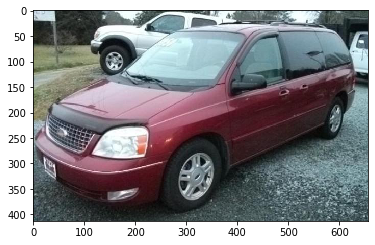

In [29]:
plt.imshow(img_crop)

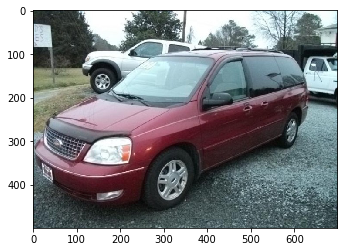

In [30]:
plt.imshow(img_original)